In [1]:
import pandas as pd

# Load the data
df_actions = pd.read_csv('data/action_labels.csv')
df_double_labels = pd.read_csv('data/double_labels.csv')

In [2]:
len(df_double_labels)

1106

In [3]:
df = df_actions.merge(df_double_labels, on='frame', suffixes=('_df1', '_df2'))
len(df)

1226

In [4]:
def label_agreement(df1, df2, column):
    # Merge on 'frame' and 'shot'
    df1_indexed = df1.set_index(['frame', 'shot'])
    df2_indexed = df2.set_index(['frame', 'shot'])
    df = df1_indexed.merge(df2_indexed, left_index=True, right_index=True, suffixes=('_df1', '_df2'))

    # Handle NaNs
    df[column + '_df1'].fillna('none', inplace=True)
    df[column + '_df2'].fillna('none', inplace=True)
    
    # Convert actions to sets
    df[column + '_df1'] = df[column + '_df1'].apply(lambda x: set(x.split()))
    df[column + '_df2'] = df[column + '_df2'].apply(lambda x: set(x.split()))

    # Compute agreement
    df['agreement'] = df.apply(lambda x: len(x[column + '_df1'].intersection(x[column + '_df2'])) > 0, axis=1)
    
    return df['agreement'].mean()

columns = ['actions', 'transitions', 'state', 'location']
for column in columns:
    print(f'Label agreement for {column}: {label_agreement(df_actions, df_double_labels, column)}')

Label agreement for actions: 0.9240506329113924
Label agreement for transitions: 0.9801084990958409
Label agreement for state: 0.9466546112115732
Label agreement for location: 0.9909584086799277


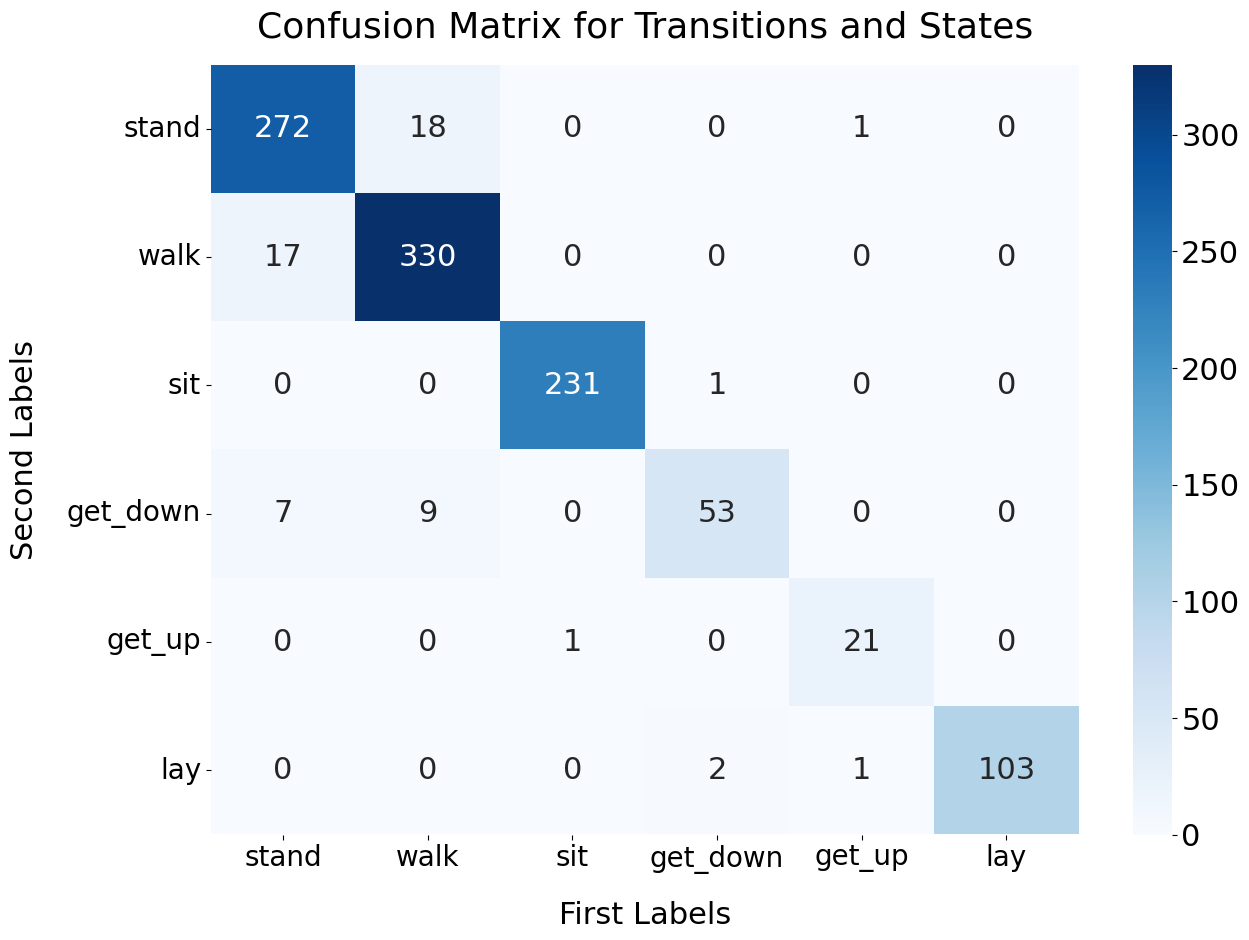

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})
plt.rc('font', family='DejaVu Sans', size=22)

# Replace NaN values with a placeholder string
df_actions = df_actions.fillna('')
df_double_labels = df_double_labels.fillna('')

# Merge the 'transitions' and 'state' columns
df_actions['transition_state'] = df_actions['transitions'] + '' + df_actions['state']
df_double_labels['transition_state'] = df_double_labels['transitions'] + '' + df_double_labels['state']

# Remove rows where 'transition_state' is an empty string
df_actions = df_actions[df_actions['transition_state'] != '']
df_double_labels = df_double_labels[df_double_labels['transition_state'] != '']

# Merge the two dataframes on 'frame' and 'shot'
df_merged = df_actions.merge(df_double_labels, on=['frame', 'shot'], suffixes=('_df1', '_df2'))

# Calculate confusion matrix
labels = pd.concat([df_merged['transition_state_df1'], df_merged['transition_state_df2']]).unique()
cm = confusion_matrix(df_merged['transition_state_df1'], df_merged['transition_state_df2'], labels=labels)

# Plot confusion matrix with increased figure width
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)

# Rotate x-axis labels and make y-axis labels horizontal
plt.xticks(rotation=0, horizontalalignment='center')
plt.yticks(rotation=0)

# Label axes and set title with increased labelpad and fontsize
ax.set_xlabel('First Labels', fontsize=22, labelpad=20)
ax.set_ylabel('Second Labels', fontsize=22, labelpad=20)
ax.set_title('Confusion Matrix for Transitions and States', fontsize=26, pad=20)

# Increase font size of labels
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# Save the figure
fig.savefig('figures/state-confusion-matrix.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

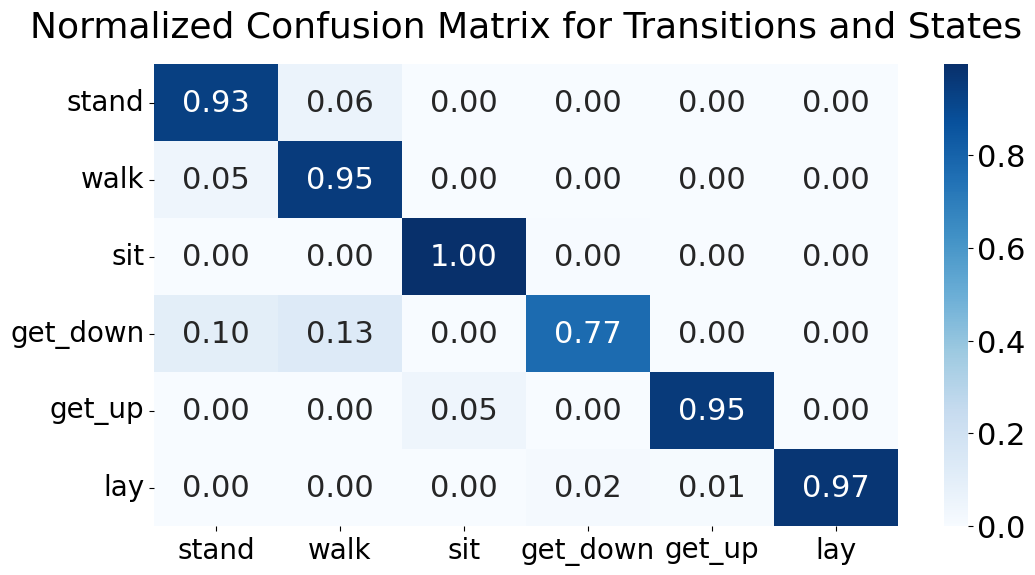

In [12]:
# Calculate confusion matrix
labels = pd.concat([df_merged['transition_state_df1'], df_merged['transition_state_df2']]).unique()
cm = confusion_matrix(df_merged['transition_state_df1'], df_merged['transition_state_df2'], labels=labels)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with increased figure width
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)

# Rotate x-axis labels and make y-axis labels horizontal
plt.xticks(rotation=0, horizontalalignment='center')
plt.yticks(rotation=0)

# Label axes and set title with increased labelpad and fontsize
ax.set_xlabel('', fontsize=22, labelpad=20)
ax.set_ylabel('', fontsize=22, labelpad=20)
ax.set_title('Normalized Confusion Matrix for Transitions and States', fontsize=26, pad=20)

# Increase font size of labels
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# Save the figure
fig.savefig('figures/state-confusion-matrix.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)


75 000163_0000019679.npy
75 000040_0000005662.npy
75 000033_0000004894.npy
75 000146_0000017758.npy
75 000015_0000002815.npy
75 000008_0000002015.npy
75 000130_0000015934.npy
75 000158_0000019134.npy
75 000101_0000012638.npy
75 000152_0000018431.npy
75 000089_0000011263.npy
75 000164_0000019806.npy
75 000074_0000009566.npy
75 000159_0000019230.npy
75 000144_0000017534.npy
75 000106_0000013183.npy
75 000115_0000014238.npy
75 000018_0000003167.npy
75 000132_0000016158.npy
75 000014_0000002718.npy
75 000019_0000003294.npy
75 000021_0000003519.npy
75 000109_0000013535.npy
75 000027_0000004191.npy
75 000037_0000005342.npy
75 000138_0000016830.npy
75 000017_0000003070.npy
75 000105_0000013086.npy
75 000036_0000005214.npy
75 000090_0000011390.npy
75 000136_0000016606.npy
75 000162_0000019582.npy
75 000126_0000015486.npy
75 000041_0000005791.npy
75 000149_0000018110.npy
75 000112_0000013886.npy
75 000083_0000010590.npy
75 000091_0000011486.npy
75 000024_0000003838.npy
75 000108_0000013438.npy


KeyboardInterrupt: 

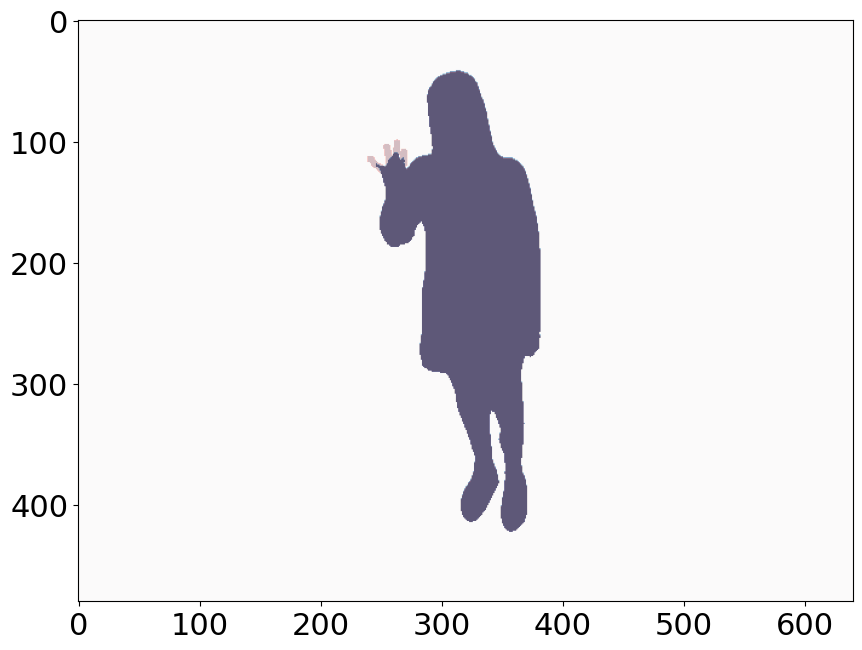

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
# import glob
# import os
# 
# def calculate_jaccard_index(mask1, mask2):
#     intersection = np.logical_and(mask1, mask2)
#     union = np.logical_or(mask2, mask1)
#     jaccard_index = np.sum(intersection) / np.sum(union)
#     return jaccard_index
# 
# def plot_masks(mask1, mask2, mask_name, shot_num):
#     plt.figure(figsize=(10,10))
#     plt.imshow(mask1, alpha=0.5, cmap='Reds')
#     plt.imshow(mask2, alpha=0.5, cmap='Blues')
#     plt.savefig(f'inspection_plots/{shot_num}_{mask_name}.png')
#     plt.close()
# 
# def error_analysis(mask1, mask2):
#     difference = np.logical_xor(mask1, mask2)
#     return difference
# 
# # Make directory to store plots
# os.makedirs('inspection_plots', exist_ok=True)
# 
# # Load the masks
# double_mask_paths = glob.glob('data/double_masks/*/*.npy')
# 
# total_jaccard_index = 0
# mask_count = 0
# 
# with open('jaccard_indices.txt', 'w') as file:
#     for path in double_mask_paths:
#         shot_num, mask_name = path.split('/')[-2], path.split('/')[-1]
#         # os.path.split(path)[1], os.path.split(path)[0]
#         print(shot_num, mask_name)
#         corresponding_mask_path = f'data/shots/{shot_num}/gt_mask/{mask_name}'
#         double_mask = np.load(path)
#         corresponding_mask = np.load(corresponding_mask_path)
#         jaccard_index = calculate_jaccard_index(double_mask, corresponding_mask)
#         file.write(f'{shot_num}_{mask_name}: {jaccard_index}\n')
#         total_jaccard_index += jaccard_index
#         mask_count += 1
#         plot_masks(double_mask, corresponding_mask, mask_name, shot_num)
# 
# average_jaccard_index = total_jaccard_index / mask_count
# print(f"Average Jaccard Index: {average_jaccard_index}")
